# EDA

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.dtypes

# All the features in the dataset are numerical values there are object types/categorical values avaialble

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
df.shape

(1599, 12)

In [12]:
#  Duplicated rows needs to be deleted as this can impact the results 

df.drop_duplicates(inplace=True)
df.shape

# 240 rows were dropped

(1359, 12)

In [13]:
# since there are no null values availables imputation is not necessary
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
df["quality"].value_counts()

# The dataset is imbalanced

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

<AxesSubplot: >

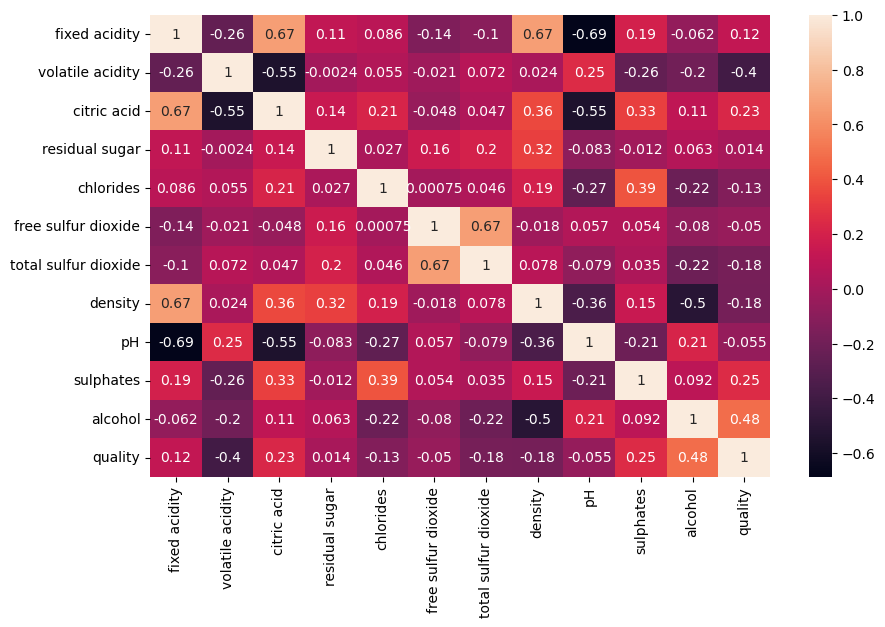

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

# Q1

In [ ]:
"""
What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.
"""

In [ ]:
"""
The dataset was provided from UCI ML Datasets. The variables which were contributing to the quality of the wine is based on the physicochemical tests. Some features in the dataset might not be contibuting much for producing the quality wine. The quality of the wine itslef is been categorized in multiple levels. Highest being the best. This contibution of the feature can be analysed by find the corrletaion between the features.

Form the heat map we can see that the alcohol has the highest positive corrlation of 48%. So we can say that this feature has the highest impact on the wine quality based on the available data
"""

# Q2

In [ ]:
"""
How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.
"""

In [ ]:
"""
The Mean/Mode/Median imputation techinques can be used to the handle the missing values based on the feature data type and values.
The SMOTE(Synthetic Minority Oversampling Technique) can also be used to fill the missing values
"""

# Q3

In [ ]:
"""
What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?
"""

In [ ]:
"""
The features in the students dataset contains both numeric and text/category features. After preprocessing the data we can use the correlation methods to find the highest imapct features and those features can be priortized and can be drilled down on those feature values to see what actually made that feature to have a higher impact on our depoedant variable.
"""

# Q4

In [ ]:
"""
Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?
"""

In [ ]:
"""
1. Domain Knowledge
2. Missing values
3. Outliers
4. Encoding
5. Dimensionality reduction
6. feature Selection
"""

# Q5

In [ ]:
"""
Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?
"""

array([[<AxesSubplot: title={'center': 'fixed acidity'}>,
        <AxesSubplot: title={'center': 'volatile acidity'}>,
        <AxesSubplot: title={'center': 'citric acid'}>],
       [<AxesSubplot: title={'center': 'residual sugar'}>,
        <AxesSubplot: title={'center': 'chlorides'}>,
        <AxesSubplot: title={'center': 'free sulfur dioxide'}>],
       [<AxesSubplot: title={'center': 'total sulfur dioxide'}>,
        <AxesSubplot: title={'center': 'density'}>,
        <AxesSubplot: title={'center': 'pH'}>],
       [<AxesSubplot: title={'center': 'sulphates'}>,
        <AxesSubplot: title={'center': 'alcohol'}>,
        <AxesSubplot: title={'center': 'quality'}>]], dtype=object)

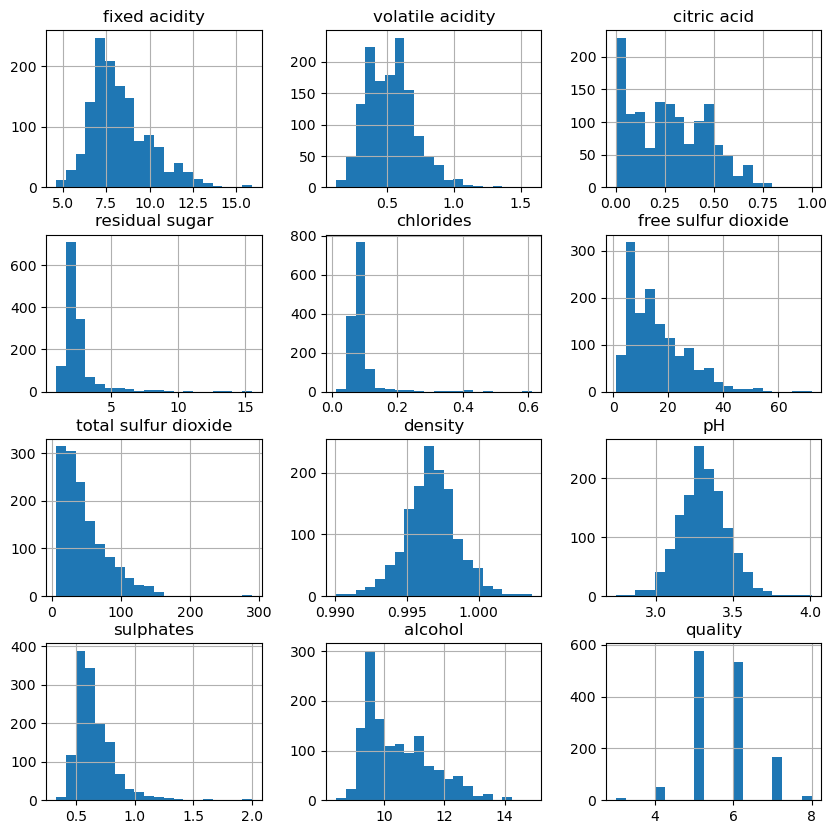

In [22]:
df.hist(bins=20, figsize=(10, 10))

# Most of the features in this dataset are right skewed we can apply the Logarithmic Transformation to normalize them

# Q6

In [ ]:
"""
Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?
"""

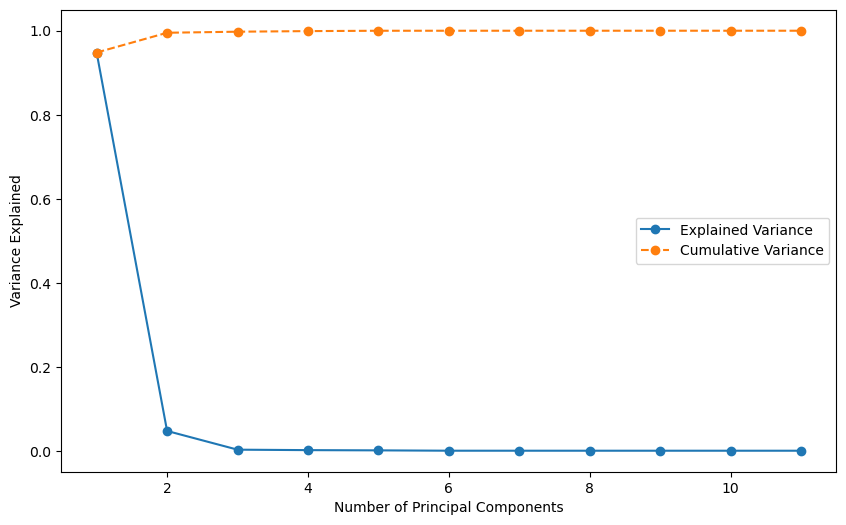

Minimum number of principal components to explain 90% variance: 1


In [24]:
from sklearn.decomposition import PCA


# Separate the features (X) from the target variable (y)
X = df.drop('quality', axis=1)

# Perform PCA
pca = PCA()
pca.fit(X)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Cumulative variance explained
cumulative_variance = np.cumsum(explained_variance)

# Find the minimum number of principal components required for 90% variance
n_components = np.argmax(cumulative_variance >= 0.9) + 1

# Plot the explained variance and cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', label='Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label='Cumulative Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.legend()
plt.show()

print(f"Minimum number of principal components to explain 90% variance: {n_components}")